In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

Hypothesis: Periods with more extreme/prolonged order book imbalance exhibit stronger multifractal behavior and long-range correlations detectable in the microprice return time series.

In [2]:
reconLOBs = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB'
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
symbols = sorted(os.listdir(reconLOBs))
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]

In [3]:
# os.listdir('/media/ak/Data1/InterestRateFuturesData/')
directory ='OrderBookImbalance'
path = os.path.join(reconLOBs,directory)
# os.mkdir(path) 
# print("Directory '%s' created" %directory) 

In [4]:
os.listdir(path)

['DU1_calendar.csv',
 'DU1_calendar.pkl',
 'FB1_calendar.csv',
 'FB1_calendar.pkl',
 'FV1_calendar.csv',
 'FV1_calendar.pkl',
 'G_1_calendar.csv',
 'G_1_calendar.pkl',
 'JB1_calendar.pkl',
 'KE1_calendar.csv',
 'KE1_calendar.pkl',
 'OE1_calendar.csv',
 'OE1_calendar.pkl',
 'OrderBookImbalance_calendar.csv',
 'RX1_calendar.csv',
 'RX1_calendar.pkl',
 'TY1_calendar.csv',
 'TY1_calendar.pkl',
 'US1_calendar.csv',
 'US1_calendar.pkl',
 'UST10y_calendar.pkl',
 'UST2y_calendar.pkl',
 'UST5y_calendar.pkl',
 'XM1_calendar.pkl',
 'YM1_calendar.pkl']

In [5]:
symbolIdx = 6
symbol = str(symbols[symbolIdx])
symbol_folder = [f for f in symbolFolders if str(symbol) in f][0]
symbol_files = os.listdir(symbol_folder)
load_test_file = os.path.join(os.path.join(symbol_folder, symbol_files[0]))
test_obi = pd.read_pickle(load_test_file)['OrderImbalance']

In [6]:
# def process_column(allSymbolsPath,symbolidx, fileidx, columnName):
#     symbol = sorted(os.listdir(allSymbolsPath))[symbolidx]
#     file_path = os.path.join(os.path.join(os.path.join(allSymbolsPath, symbol), 
#                                           os.listdir(os.path.join(allSymbolsPath, symbol))[0]))
#     load_file = pd.read_pickle(file_path)
#     return load_file[str(columnName)]
def process_column(allSymbolsPath, symbolidx, fileidx, columnName):
    """
    Extracts a specific column from a file in a nested directory structure.

    Parameters:
    allSymbolsPath (str): The base path to the directory containing the symbols.
    symbolidx (int): Index to select the symbol directory from the sorted list of directories.
    fileidx (int): Index to select the file from the sorted list of files in the symbol directory.
    columnName (str): The name of the column to be retrieved from the file.

    Returns:
    pandas.Series: The specified column from the file as a pandas Series.

    Raises:
    IndexError: If symbolidx or fileidx is out of range.
    FileNotFoundError: If the file or directory does not exist.
    """

    # Get the list of symbol directories, sorted to ensure consistent ordering
    symbols = sorted(os.listdir(allSymbolsPath))
    if symbolidx >= len(symbols):
        raise IndexError("symbolidx is out of range")

    symbol = symbols[symbolidx]

    # Construct the path to the symbol directory
    symbol_dir_path = os.path.join(allSymbolsPath, symbol)

    # Get the list of files in the symbol directory, sorted to ensure consistent ordering
    files = sorted(os.listdir(symbol_dir_path))
    if fileidx >= len(files):
        raise IndexError("fileidx is out of range")

    file_name = files[fileidx]

    # Construct the full file path
    file_path = os.path.join(symbol_dir_path, file_name)

    # Load the specified file
    try:
        load_file = pd.read_pickle(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"The file {file_path} does not exist")

    # Retrieve and return the specified column
    try:
        return load_file[columnName]
    except KeyError:
        raise KeyError(f"Column {columnName} not found in the file")

# Example usage
# result = process_column('/path/to/symbols', 0, 0, 'desired_column_name')


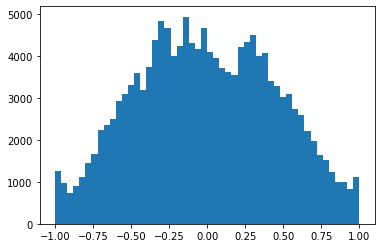

In [7]:
_=plt.hist(test_obi, bins = 50)

In [9]:
# # Assuming process_column function is defined as in the previous example

allSymbolsPath = reconLOBs
symbolidx = 7
columnName = 'OrderImbalance'

# # Get the list of files in the specified symbol directory
# symbol = sorted(os.listdir(allSymbolsPath))[symbolidx]
# symbol_dir_path = os.path.join(allSymbolsPath, symbol)
# files = sorted(os.listdir(symbol_dir_path))

# # Dictionary comprehension to apply the function for each file
# # Dictionary comprehension to apply the function for each file, using the index as the key
# column_data = {fileidx: process_column(allSymbolsPath, symbolidx, fileidx, columnName) 
#                for fileidx in range(len(files))}


In [10]:
os.listdir(path)

['DU1_calendar.csv',
 'DU1_calendar.pkl',
 'FB1_calendar.csv',
 'FB1_calendar.pkl',
 'FV1_calendar.csv',
 'FV1_calendar.pkl',
 'G_1_calendar.csv',
 'G_1_calendar.pkl',
 'JB1_calendar.pkl',
 'KE1_calendar.csv',
 'KE1_calendar.pkl',
 'OE1_calendar.csv',
 'OE1_calendar.pkl',
 'OrderBookImbalance_calendar.csv',
 'RX1_calendar.csv',
 'RX1_calendar.pkl',
 'TY1_calendar.csv',
 'TY1_calendar.pkl',
 'US1_calendar.csv',
 'US1_calendar.pkl',
 'UST10y_calendar.pkl',
 'UST2y_calendar.pkl',
 'UST5y_calendar.pkl',
 'XM1_calendar.pkl',
 'YM1_calendar.pkl']

In [11]:
rx = os.path.join(path,'G_1_calendar.pkl')

In [12]:
rx_df = pd.read_pickle(rx)

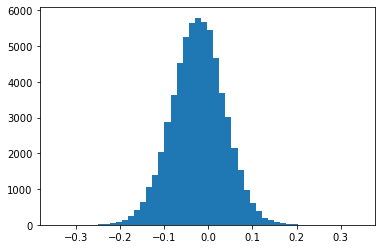

In [13]:
_=plt.hist(rx_df.median(axis=1), bins = 50)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_acf_with_std(df, lags=20):
    """
    Plots the ACF for the median of a pandas DataFrame with standard deviation shaded.

    Parameters:
    df (pandas.DataFrame): DataFrame with numerical data.
    lags (int): Number of lags to include in the ACF plot.
    """
    # Calculate the median of the DataFrame
    median_series = df.median()

    # Calculate ACF and the confidence interval
    acf, confint = sm.tsa.acf(median_series, nlags=lags, alpha=0.05, fft=True)[:2]

    # Calculate standard deviation
    std_dev = (confint - acf[:, None]).mean(axis=1)

    # Plot ACF
    plt.plot(acf, marker='o', linestyle='--', color='blue')

    # Plot the standard deviation as shaded area
    plt.fill_between(range(len(acf)), acf - std_dev, acf + std_dev, color='blue', alpha=0.9)

    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title('ACF with Standard Deviation Shade')
    plt.show()

# Example usage with a sample DataFrame
# df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))



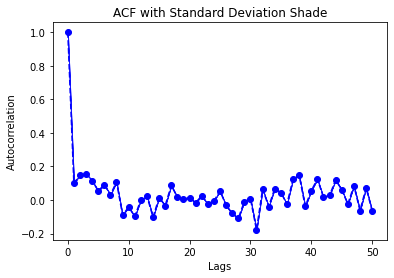

In [15]:
plot_acf_with_std(rx_df, lags=50)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_custom_acf(df, lags=20, symbol='Symbol', figuresLocation='/path/to/save/figures'):
    """
    Plots the ACF for the median of a pandas DataFrame with a custom style.

    Parameters:
    df (pandas.DataFrame): DataFrame with numerical data.
    lags (int): Number of lags to include in the ACF plot.
    symbol (str): Symbol name for the title.
    figuresLocation (str): Path to save the figure.
    """
    # Calculate the median of the DataFrame
    median_series = df.median()

    # Calculate ACF and the confidence interval
    acf, confint = sm.tsa.acf(median_series, nlags=lags, alpha=0.05, fft=True)[:2]

    # Calculate standard deviation
    std_dev = (confint - acf[:, None]).mean(axis=1)

    # Plot settings
    size = 5
    plt.rcParams.update({'legend.fontsize': '15',
                         'figure.figsize': (16, 9),
                         'axes.labelsize': size,
                         'axes.titlesize': size,
                         'xtick.labelsize': size * 0.75,
                         'ytick.labelsize': size * 0.75,
                         'axes.titlepad': 25})

    # Plot ACF
    plt.plot(acf, marker='o', linestyle='--', color='blue', label='ACF')

    # Plot the standard deviation as shaded area
    plt.fill_between(range(len(acf)), acf - std_dev, acf + std_dev, color='blue', alpha=0.2)

    # Custom part (similar to provided code snippet)
    # ...

    plt.grid(True)
    plt.xlabel("Time Lag", fontsize=15)
    plt.ylabel("Auto-Correlation", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15, loc=1)
    title = f'{symbol}_OBI_auto_correlation.png'
    plt.title(f"ACF for {symbol}", fontsize=15)
    
    # Save the plot
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

# Example usage
# 


In [ ]:
plot_custom_acf(rx_df, lags=20, symbol='RX1', figuresLocation=figuresLocation)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def plot_acf_and_histogram(df, lags=20, symbol='Symbol', figuresLocation='/path/to/save/figures'):
    """
    Plots the ACF and a histogram distribution for the median of a pandas DataFrame, side by side.

    Parameters:
    df (pandas.DataFrame): DataFrame with numerical data.
    lags (int): Number of lags to include in the ACF plot.
    symbol (str): Symbol name for the title.
    figuresLocation (str): Path to save the figure.
    """
    # Calculate the median of the DataFrame
    median_series = df.median()

    # Calculate ACF and the confidence interval
    acf, confint = sm.tsa.acf(median_series, nlags=lags, alpha=0.05, fft=True)[:2]

    # Calculate standard deviation
    std_dev = (confint - acf[:, None]).mean(axis=1)

    # Create a figure and a set of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # ACF plot on the first subplot
    ax1.plot(acf, marker='o', linestyle='--', color='blue', label='ACF')
    ax1.fill_between(range(len(acf)), acf - std_dev, acf + std_dev, color='blue', alpha=0.2)
    ax1.set_xlabel("Time Lag", fontsize=15)
    ax1.set_ylabel("Auto-Correlation", fontsize=15)
    ax1.set_title(f"ACF for {symbol}", fontsize=15)

    ax1.tick_params(axis='both', which='major', labelsize=22)  # Set font size for ticks here

    ax1.grid(True)

    # Histogram with KDE plot on the second subplot
    sns.histplot(median_series, ax=ax2, color='blue', alpha =0.2)
    sns.kdeplot(median_series, ax=ax2, color='red', linestyle='dotted',linewidth=7)
    ax2.set_xlabel("Values", fontsize=15)
    ax2.set_ylabel("Frequency", fontsize=25)
    ax2.set_title(f"Distribution of Median Values for {symbol}", fontsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=12)  # Set font size for ticks here
    ax2.grid(True)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    title = f'{symbol}_ACF_and_Distribution.png'
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

# Example usage
# plot_acf_and_histogram(df, lags=20, symbol='YourSymbol', figuresLocation='/path/to/figures')


In [ ]:
plot_acf_and_histogram(rx_df, lags=20, symbol='RX1', figuresLocation=figuresLocation)

In [ ]:
import pandas as pd

def identify_extreme_obi_periods(data, window_length, threshold):
    """
    Identifies periods with extreme persistent order book imbalance for each day.

    Parameters:
    data (pd.DataFrame): DataFrame where each column is one day's worth of intraday OBI series.
    window_length (int): Rolling window length in the same units as the DataFrame's index.
    threshold (float): Threshold for defining extreme/persistent imbalance.

    Returns:
    dict: A dictionary where keys are column names (days) and values are DataFrames with additional 
          columns indicating extreme OBI periods for that day.
    """
    extreme_obi_periods = {}

    for day in data.columns:
        # Calculate rolling average OBI
        data[day, 'OBI_avg'] = data[day].rolling(window=window_length, min_periods=1).mean()

        # Identify extreme/persistent imbalance periods
        data[day, 'Extreme_Bid_Imbalance'] = data[day, 'OBI_avg'] > threshold
        data[day, 'Extreme_Ask_Imbalance'] = data[day, 'OBI_avg'] < -threshold

        extreme_obi_periods[day] = data[[day, day + 'OBI_avg', day + 'Extreme_Bid_Imbalance', day + 'Extreme_Ask_Imbalance']].copy()

    return extreme_obi_periods

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data
# processed_data = identify_extreme_obi_periods(df, 30, 0.2)


In [ ]:
processed_df = identify_extreme_obi_periods(rx_df, 30, 0.2)

In [ ]:
rx_df.columns


In [ ]:
rx_df

In [28]:
def identify_extreme_obi_periods(data, window_length, threshold):
    """
    Identifies periods with extreme persistent order book imbalance for each day.

    Parameters:
    data (pd.DataFrame): DataFrame where each column is one day's worth of intraday OBI series.
    window_length (int): Rolling window length in the same units as the DataFrame's index.
    threshold (float): Threshold for defining extreme/persistent imbalance.

    Returns:
    dict: A dictionary where keys are column names (days) and values are DataFrames with additional 
          columns indicating extreme OBI periods for that day.
    """
    extreme_obi_periods = {}

    for day in data.columns:
        day_data = data[day].to_frame(name='OBI')
        day_data['OBI_avg'] = day_data['OBI'].rolling(window=window_length, min_periods=1).mean()
        day_data['Extreme_Bid_Imbalance'] = day_data['OBI_avg'] > threshold
        day_data['Extreme_Ask_Imbalance'] = day_data['OBI_avg'] < -threshold
        extreme_obi_periods[day] = day_data

    return extreme_obi_periods

# Example usage
# processed_data = identify_extreme_obi_periods(rx_df, 30, 0.2)


In [29]:
obi_dict = identify_extreme_obi_periods(rx_df, 30, 0.2)

In [34]:
bid_imbalance = []
ask_imbalance = []

# Extract imbalance data
for day_df in obi_dict.values():
    bid_imbalance.extend(day_df.loc[day_df['Extreme_Bid_Imbalance'], 'OBI_avg'])
    ask_imbalance.extend(day_df.loc[day_df['Extreme_Ask_Imbalance'], 'OBI_avg'])

In [37]:
bid_imbalance = pd.Series(bid_imbalance)
ask_imbalance = pd.Series(ask_imbalance)

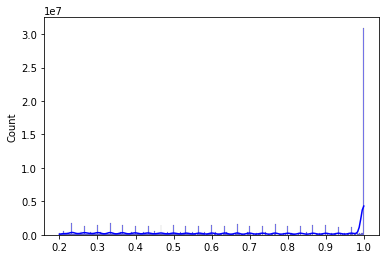

In [39]:
sns.histplot(bid_imbalance, kde=True,  color='blue')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_imbalance_histograms(obi_data_dict, tick_size=18):
    """
    Plots histograms for Extreme Bid and Ask Imbalance.

    Parameters:
    obi_data_dict (dict): Dictionary with DataFrames containing OBI data for each day.
    tick_size (int): Size of ticks in the plots.
    """
    bid_imbalance = []
    ask_imbalance = []

    # Extract imbalance data
    for day_df in obi_data_dict.values():
        bid_imbalance.extend(day_df.loc[day_df['Extreme_Bid_Imbalance'], 'OBI_avg'])
        ask_imbalance.extend(day_df.loc[day_df['Extreme_Ask_Imbalance'], 'OBI_avg'])

    # Create a figure for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Extreme Bid Imbalance
    sns.histplot(bid_imbalance, kde=True, ax=axes[0], color='blue')
    axes[0].set_title('Extreme Bid Imbalance')
    axes[0].axvline(x=np.median(bid_imbalance), color='red', linestyle='dotted', linewidth=1)
    axes[0].axvline(x=np.percentile(bid_imbalance, 5), color='green', linestyle='dotted', linewidth=1)
    axes[0].axvline(x=np.percentile(bid_imbalance, 95), color='green', linestyle='dotted', linewidth=1)

    # Plot Extreme Ask Imbalance
    sns.histplot(ask_imbalance, kde=True, ax=axes[1], color='orange')
    axes[1].set_title('Extreme Ask Imbalance')
    axes[1].axvline(x=np.median(ask_imbalance), color='red', linestyle='dotted', linewidth=1)
    axes[1].axvline(x=np.percentile(ask_imbalance, 5), color='green', linestyle='dotted', linewidth=1)
    axes[1].axvline(x=np.percentile(ask_imbalance, 95), color='green', linestyle='dotted', linewidth=1)

    # Set tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=tick_size)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_imbalance_histograms(processed_data, tick_size=12)


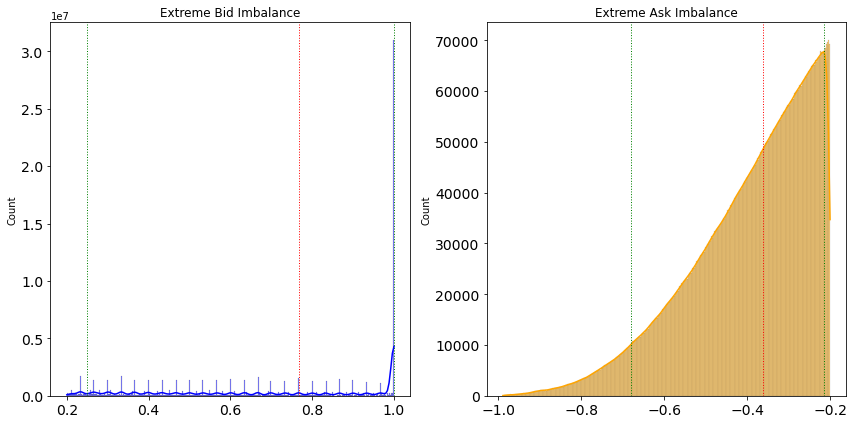

In [40]:

# Example usage:
plot_imbalance_histograms(obi_dict, tick_size=14)

In [41]:
test_file = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBI_extremes_JB1_calendar_.pkl'

In [46]:
pd.read_pickle(test_file)['JB1'][0]

,OBI,OBI_avg,Extreme_Bid_Imbalance,Extreme_Ask_Imbalance
1,-0.142857,-0.142857,False,False
2,-0.149606,-0.146232,False,False
3,-0.339450,-0.210638,False,True
4,-0.362832,-0.248686,False,True
5,-0.362832,-0.271515,False,True
...,...,...,...,...
489,0.203883,-0.127330,False,False
490,0.180952,-0.102221,False,False
491,0.180952,-0.083226,False,False
492,0.203883,-0.059258,False,False


In [50]:
extreme_files = [f for f in os.listdir('/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/') if str('extremes') in f]

In [51]:
OBIpath ='/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance'

In [255]:
filepath = os.path.join(OBIpath, extreme_files[7])
print(filepath)

/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBI_extremes_OE1_calendar_.pkl


In [263]:
pickle = pd.read_pickle(filepath)
symbol = 'OE1'#list(pickle.keys())#[0]
df =pickle #[str(symbol)]
dict_dfs = pickle#[str(symbol)]

In [264]:
pickle

{0:             OBI   OBI_avg  Extreme_Bid_Imbalance  Extreme_Ask_Imbalance
 1     -0.059140 -0.059140                  False                  False
 2     -0.448529 -0.253835                  False                   True
 3     -0.045093 -0.184254                  False                  False
 4     -0.047619 -0.150095                  False                  False
 5     -0.333333 -0.186743                  False                  False
 ...         ...       ...                    ...                    ...
 67828 -0.009363 -0.104391                  False                  False
 67829 -0.333893 -0.110088                  False                  False
 67830  0.000946 -0.104724                  False                  False
 67831  0.005385 -0.099112                  False                  False
 67832  0.011795 -0.093265                  False                  False
 
 [67832 rows x 4 columns],
 1:             OBI   OBI_avg  Extreme_Bid_Imbalance  Extreme_Ask_Imbalance
 1     -0.502538

In [267]:
import pandas as pd
import pandas as pd

def analyze_imbalance(df):
    proportion_bid_imbalance = df['Extreme_Bid_Imbalance'].mean()
    proportion_ask_imbalance = df['Extreme_Ask_Imbalance'].mean()
    median_bid_imbalance = df.loc[df['Extreme_Bid_Imbalance'], 'OBI_avg'].median()
    median_ask_imbalance = df.loc[df['Extreme_Ask_Imbalance'], 'OBI_avg'].median()
    avg_imbalance = df['OBI_avg'].mean()

    return [proportion_bid_imbalance, proportion_ask_imbalance, median_bid_imbalance, median_ask_imbalance, avg_imbalance]

def analyze_multiple_dfs(dfs_dict, save_path):
    results = []

    for label, df in dfs_dict.items():
        if isinstance(df, pd.DataFrame):
            df_results = analyze_imbalance(df)
            results.append([label] + df_results)
        else:
            raise ValueError(f"Entry for {label} is not a pandas DataFrame.")

    results_df = pd.DataFrame(results, columns=['Label', 'Proportion of Extreme Bid Imbalance', 
                                                'Proportion of Extreme Ask Imbalance', 
                                                'Median Extreme Bid Imbalance', 
                                                'Median Extreme Ask Imbalance', 
                                                'Average Imbalance'])

    # Convert to LaTeX and save
    latex_str = results_df.to_latex(index=False, header=True, column_format='lccccc', escape=False)
    latex_str = latex_str.replace('\\toprule', '\\hline\\hline')
    latex_str = latex_str.replace('\\midrule', '')
    latex_str = latex_str.replace('\\bottomrule', '\\hline\\hline')

    with open(save_path, 'w') as file:
        file.write(latex_str)

    return results_df

# Example usage:
# dfs_dict = {'DF1': pd.DataFrame(...), 'DF2': pd.DataFrame(...), ...}
# save_path = '/your/desired/path/imbalance_analysis.tex'
# analyze_multiple_dfs(dfs_dict, save_path)


# # Example usage:
# df = pd.DataFrame({
#     'OBI': [-0.142857, -0.149606, -0.339450, -0.362832, -0.362832, 0.203883, 0.180952, 0.180952, 0.203883, 0.180952],
#     'OBI_avg': [-0.142857, -0.146232, -0.210638, -0.248686, -0.271515, -0.127330, -0.102221, -0.083226, -0.059258, -0.052546],
#     'Extreme_Bid_Imbalance': [False, False, False, False, False, False, False, False, False, False],
#     'Extreme_Ask_Imbalance': [False, False, True, True, True, False, False, False, False, False]
# })




In [269]:
# Usage example
# df = pd.DataFrame(...)  # Your DataFrame here
save_path = os.path.join('/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/', str(symbol)+'_OBI_summary.tex')
analyze_multiple_dfs(df, save_path)


,Label,Proportion of Extreme Bid Imbalance,Proportion of Extreme Ask Imbalance,Median Extreme Bid Imbalance,Median Extreme Ask Imbalance,Average Imbalance
0,0,0.249396,0.338513,0.365151,-0.385466,-0.041152
1,1,0.269475,0.370563,0.398953,-0.385681,-0.039543
2,2,0.359742,0.229833,0.380764,-0.380756,0.056556
3,3,0.291057,0.320675,0.391445,-0.377678,-0.009852
4,4,0.232059,0.389993,0.387068,-0.397189,-0.072519
...,...,...,...,...,...,...
134,134,0.259774,0.310414,0.360728,-0.365372,-0.021671
135,135,0.392160,0.258374,0.410731,-0.396372,0.063542
136,136,0.340429,0.290939,0.391532,-0.412739,0.017339
137,137,0.346783,0.311210,0.414090,-0.406345,0.022110


In [233]:
import pandas as pd

def analyze_imbalance(df):
    total_rows = len(df)
    proportion_bid_imbalance = (df['Extreme_Bid_Imbalance'].sum() / total_rows) * 100
    proportion_ask_imbalance = (df['Extreme_Ask_Imbalance'].sum() / total_rows) * 100
    median_bid_imbalance = df.loc[df['Extreme_Bid_Imbalance'], 'OBI_avg'].median()
    median_ask_imbalance = df.loc[df['Extreme_Ask_Imbalance'], 'OBI_avg'].median()
    avg_imbalance = df['OBI_avg'].mean()

    return {
        'Proportion of Extreme Bid Imbalance (%)': proportion_bid_imbalance,
        'Proportion of Extreme Ask Imbalance (%)': proportion_ask_imbalance,
        'Median Extreme Bid Imbalance': median_bid_imbalance,
        'Median Extreme Ask Imbalance': median_ask_imbalance,
        'Average Imbalance': avg_imbalance
    }

# The analyze_multiple_dfs function remains the same

# Example usage
# Assuming dfs_dict is a dictionary of DataFrames



def analyze_multiple_dfs(dfs_dict):
    results = {}
    for label, df in dfs_dict.items():
        if isinstance(df, pd.DataFrame):
            results[label] = analyze_imbalance(df)
        else:
            raise ValueError(f"Item for {label} is not a pandas DataFrame.")

    return pd.DataFrame(results)

# Example usage:
# dfs_dict = {
#     'JB1': pd.DataFrame({...}),  # Replace {...} with the actual data for JB1
#     'JB2': pd.DataFrame({...}),  # Replace {...} with the actual data for JB2
#     # Add more DataFrames as needed
# }

# result_df = analyze_multiple_dfs(dfs_dict)
# print(result_df)


In [236]:
result_dfs = analyze_multiple_dfs(pickle)

In [237]:
results = result_dfs.T
results.columns.values

array(['Proportion of Extreme Bid Imbalance (%)',
       'Proportion of Extreme Ask Imbalance (%)',
       'Median Extreme Bid Imbalance', 'Median Extreme Ask Imbalance',
       'Average Imbalance'], dtype=object)

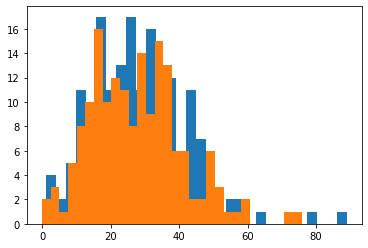

In [238]:
_=plt.hist(results['Proportion of Extreme Ask Imbalance (%)'], bins =30)
_=plt.hist(results['Proportion of Extreme Bid Imbalance (%)'], bins =30)

#_=plt.hist(results['Median Extreme Ask Imbalance'], bins =30)

In [239]:
results.columns.values

array(['Proportion of Extreme Bid Imbalance (%)',
       'Proportion of Extreme Ask Imbalance (%)',
       'Median Extreme Bid Imbalance', 'Median Extreme Ask Imbalance',
       'Average Imbalance'], dtype=object)

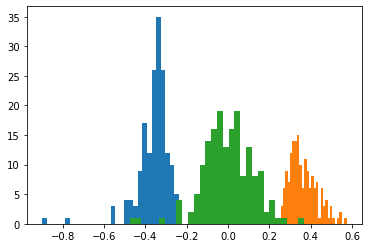

In [240]:
_=plt.hist(results['Median Extreme Ask Imbalance'], bins =30)
_=plt.hist(results['Median Extreme Bid Imbalance'], bins =30)
_=plt.hist(results['Average Imbalance'], bins =30)

In [241]:


def plot_histograms_side_by_side(results, tick_size_x, tick_size_y, symbol):
    figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
    if not isinstance(results, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

    # First subplot
    sns.histplot(results['Median Extreme Ask Imbalance'], bins=30, ax=axes[0], color='blue', kde=True, line_kws={'color': 'navy', 'lw': 2})
    sns.histplot(results['Median Extreme Bid Imbalance'], bins=30, ax=axes[0], color='green', kde=True, line_kws={'color': 'darkgreen', 'lw': 2})
    sns.histplot(results['Average Imbalance'], bins=30, ax=axes[0], color='red', kde=True, line_kws={'color': 'darkred', 'lw': 2})
    axes[0].set_title('Median and Average Imbalances')
    axes[0].tick_params(axis='x', labelsize=tick_size_x)
    axes[0].tick_params(axis='y', labelsize=tick_size_y)
    axes[0].axvline(results['Median Extreme Ask Imbalance'].median(), color='navy', linestyle='dashed', linewidth=1)
    axes[0].axvline(results['Median Extreme Bid Imbalance'].median(), color='darkgreen', linestyle='dashed', linewidth=1)
    axes[0].axvline(results['Average Imbalance'].median(), color='darkred', linestyle='dashed', linewidth=1)
    axes[0].legend(['Median Ask Imbalance KDE', 'Median Bid Imbalance KDE', 'Average Imbalance KDE'])

    # Second subplot
    sns.histplot(results['Proportion of Extreme Ask Imbalance (%)'], bins=30, ax=axes[1], color='blue', kde=True, line_kws={'color': 'navy', 'lw': 2})
    sns.histplot(results['Proportion of Extreme Bid Imbalance (%)'], bins=30, ax=axes[1], color='green', kde=True, line_kws={'color': 'darkgreen', 'lw': 2})
    axes[1].set_title('Proportion of Extreme Imbalances')
    axes[1].tick_params(axis='x', labelsize=tick_size_x)
    axes[1].tick_params(axis='y', labelsize=tick_size_y)
    axes[1].axvline(results['Proportion of Extreme Ask Imbalance (%)'].median(), color='navy', linestyle='dashed', linewidth=1)
    axes[1].axvline(results['Proportion of Extreme Bid Imbalance (%)'].median(), color='darkgreen', linestyle='dashed', linewidth=1)
    axes[1].legend(['Proportion Ask Imbalance KDE', 'Proportion Bid Imbalance KDE'])

        # Save the plot
    title = f'{symbol}_OBI_Calendar_Distribution.png'
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_histograms_side_by_side(results, tick_size_x=10, tick_size_y=10)


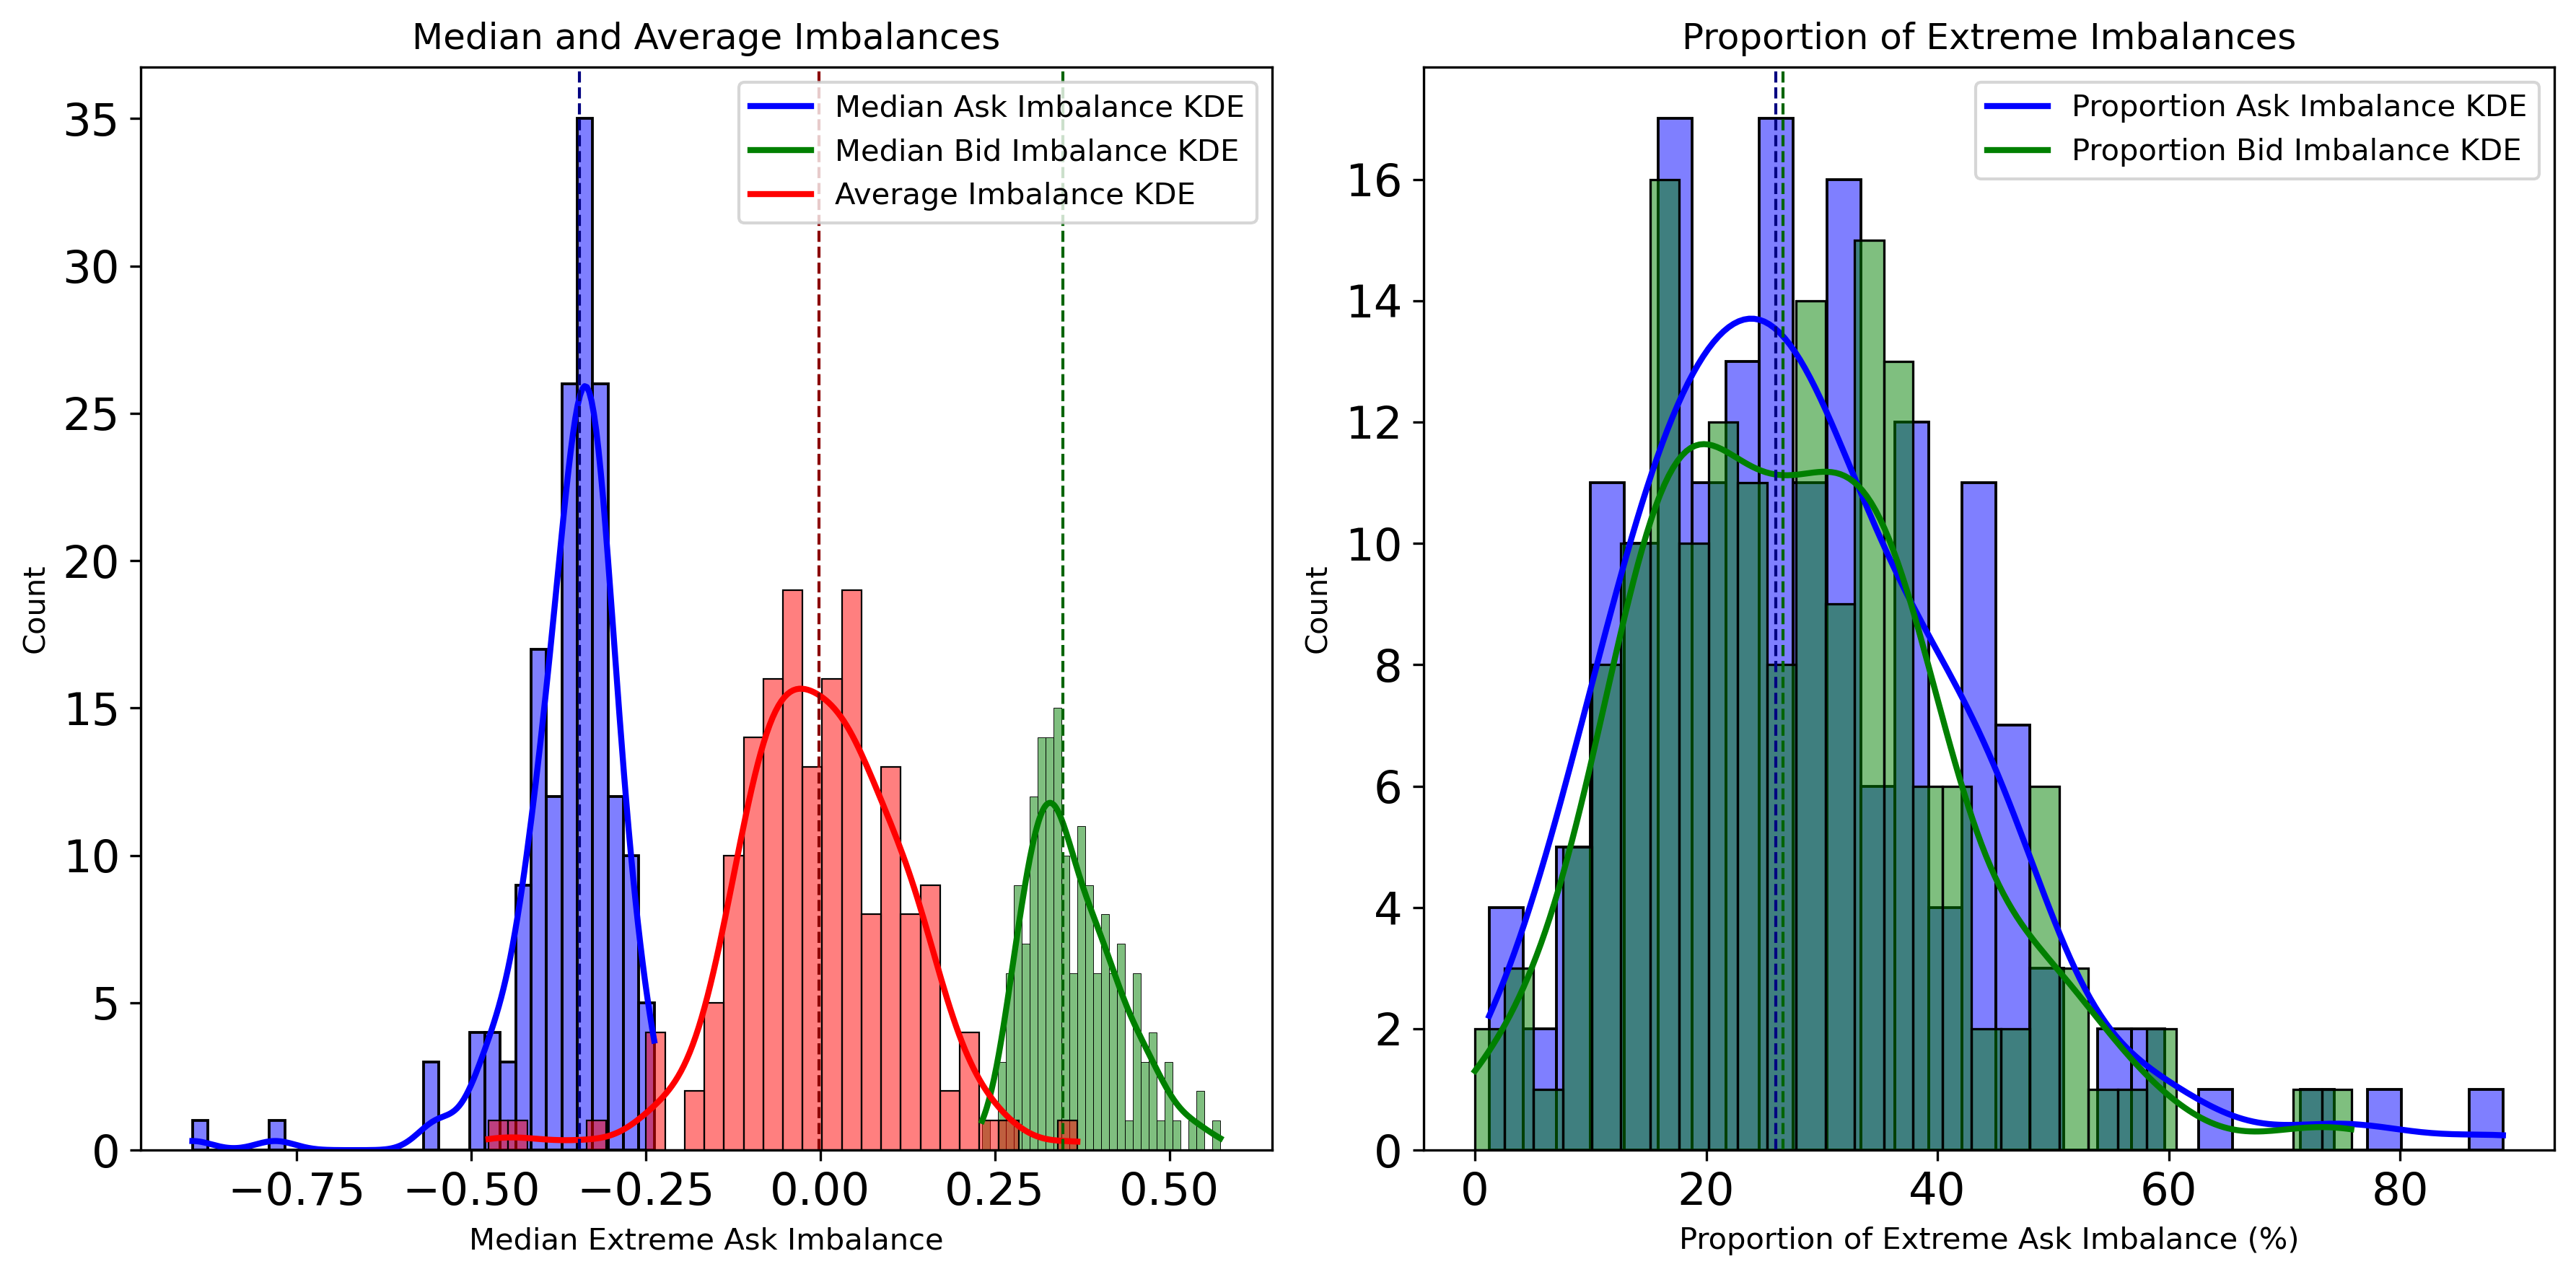

In [242]:
plot_histograms_side_by_side(results, tick_size_x=15, symbol = symbol, tick_size_y=15)

### Testing Hypothesis ###